In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import chi2_contingency
import missingno as msno

Import Data Set and make a copy.

In [2]:
pwd = os.getcwd()
twitch = pd.read_csv(pwd + '/data-twitchdata-update.csv')
twitch_modified = twitch.copy()
twitch_modified

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [6]:
twitch_modified.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [3]:
twitch_modified = twitch_modified.rename({'Watch time(Minutes)':'Watch_Time(Minutes)', 'Stream time(minutes)':'Stream_Time(Minutes)', 'Peak viewers':'Peak_Viewers', 'Average viewers':'Average_Viewers', 'Followers gained':'Followers_Gained', 'Views gained':'Views_Gained'}, axis=1)
twitch_modified

,Channel,Watch_Time(Minutes),Stream_Time(Minutes),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


<font size= "6">Univariate Analysis</font>

<font size= "3">Common Data Types</font>

In [15]:
##Data types

twitch_modified.dtypes

Channel                  object
Watch_Time(Minutes)     float64
Stream_Time(Minutes)      int64
Peak_Viewers              int64
Average_Viewers           int64
Followers                 int64
Followers_Gained          int64
Views_Gained              int64
Partnered                  bool
Mature                     bool
Language                 object
dtype: object

<font size= "3">Seeing if there is missing values</font>

<AxesSubplot:>

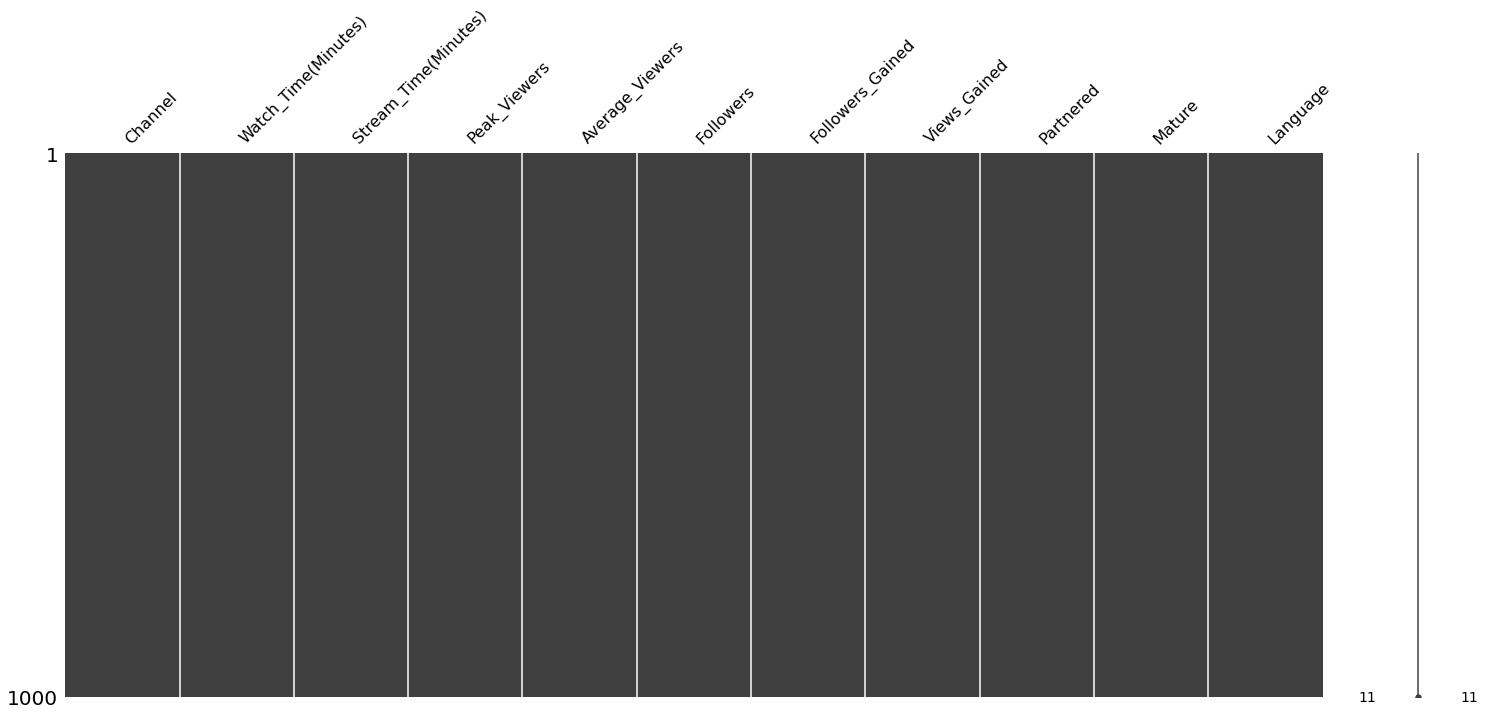

In [16]:
##Missing Values

msno.matrix(twitch_modified)

/Users/simeononyeka/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/simeononyeka/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

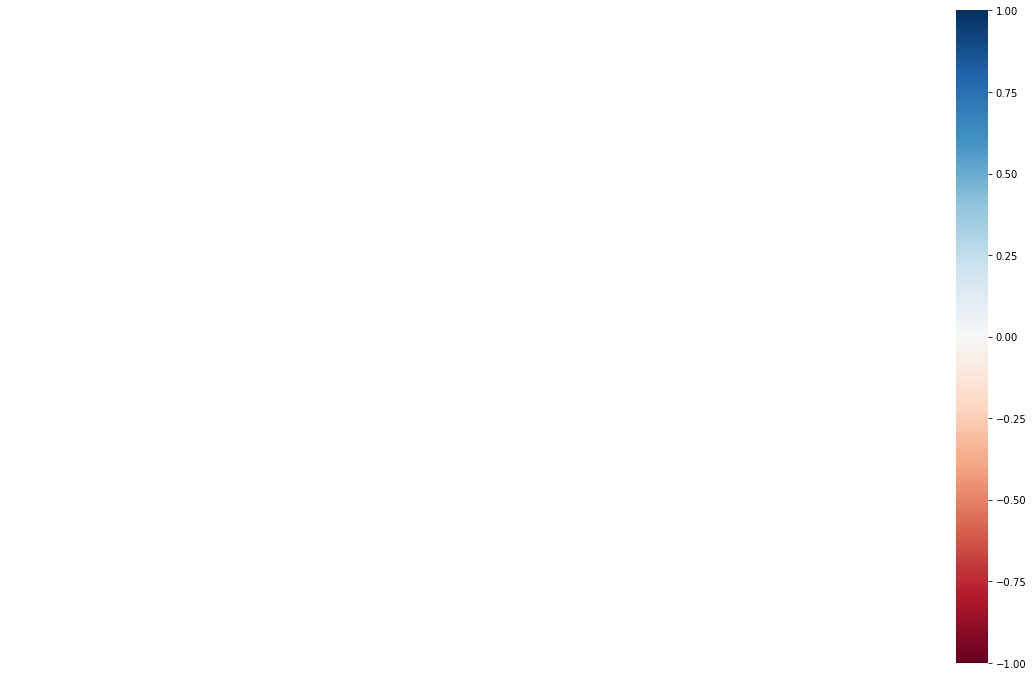

In [17]:
##Missing variable heatmap

msno.heatmap(twitch_modified)

<font size= "3">Numerical Data Types</font>

In [18]:
## Quantile / Descriptive Statistics #

twitch_modified.describe()

,Watch_Time(Minutes),Stream_Time(Minutes),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.162300e+05,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,1.526765e+05,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,3.394246e+04,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,4.533053e+04,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,6.527522e+04,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,1.204833e+05,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,1.721156e+06,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [5]:
## convert watch time and stream time to hours

twitch_modified['Watch_Time(Minutes)'] = twitch_modified['Watch_Time(Minutes)'] / 60
twitch_modified['Stream_Time(Minutes)'] = twitch_modified['Stream_Time(Minutes)'] / 60
twitch_modified

,Channel,Watch_Time(Minutes),Stream_Time(Minutes),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
0,xQcOW,1.032694e+08,3587.50,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,1.015280e+08,3530.75,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,9.407652e+07,8588.00,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,6.617197e+07,8629.00,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,6.118333e+07,2061.00,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,2.042077e+06,226.00,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),2.042062e+06,2550.00,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),2.040872e+06,3623.50,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,2.038518e+06,1745.75,10543,1153,547446,109111,3926918,True,False,English


In [6]:
twitch_modified = twitch_modified.rename({'Watch_Time(Minutes)':'Watch_Time(Hours)', 'Stream_Time(Minutes)':'Stream_Time(Hours)'}, axis=1)
twitch_modified

,Channel,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
0,xQcOW,1.032694e+08,3587.50,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,1.015280e+08,3530.75,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,9.407652e+07,8588.00,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,6.617197e+07,8629.00,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,6.118333e+07,2061.00,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,2.042077e+06,226.00,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),2.042062e+06,2550.00,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),2.040872e+06,3623.50,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,2.038518e+06,1745.75,10543,1153,547446,109111,3926918,True,False,English


In [7]:
twitch_modified.describe()

,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.973799e+06,2008.586000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,9.160592e+06,1422.936689,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,2.036548e+06,57.750000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,2.719832e+06,1229.312500,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,3.916513e+06,1804.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,7.228999e+06,2364.062500,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,1.032694e+08,8690.750000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [20]:
# Mean and Median of Data

middle_describe = twitch_modified.describe().loc[['mean', '50%'], :]
middle_describe.transpose()

,mean,50%
Watch_Time(Hours),6.973799e+06,3916513.125
Stream_Time(Hours),2.008586e+03,1804.000
Peak_Viewers,3.706505e+04,16676.000
Average_Viewers,4.781040e+03,2425.000
Followers,5.700541e+05,318063.000
Followers_Gained,2.055185e+05,98352.000
Views_Gained,1.166817e+07,6456323.500


In [21]:
# Violin Plot of Watch time Data



px.violin(
    twitch_modified,
    x= 'Watch_Time(Hours)',
    box=True,
    points='all'
)

In [22]:
# highest value in the Watch_Time column

twitch_modified[twitch_modified['Watch_Time(Hours)'] == twitch_modified['Watch_Time(Hours)'].max()]

,Channel,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
0,xQcOW,103269362.5,3587.5,222720,27716,3246298,1734810,93036735,True,False,English


In [24]:
# Violin Plot of Average Viewers Data

px.violin(
    twitch_modified,
    x= 'Average_Viewers',
    box=True,
    points='all'
)

In [32]:
#highest value in the Average_Views columns

twitch_modified[twitch_modified['Average_Viewers'] == twitch_modified['Average_Viewers'].max()]

,Channel,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
81,dota2ti,16959626.75,105.25,483530,147643,663297,121422,16228039,True,False,English


In [26]:
# Violin Plot of Views Gained Data



px.violin(
    twitch_modified,
    x= 'Views_Gained',
    box=True,
    points='all'
)

In [27]:
#highest value in the Views_Gained column

twitch_modified[twitch_modified['Views_Gained'] == twitch_modified['Views_Gained'].max()]

,Channel,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Followers_Gained,Views_Gained,Partnered,Mature,Language
7,Fextralife,15286.423542,2464.75,68795,18985,508816,425468,670137548,True,False,English


<font size= "3">Categorical Data Types</font>

In [33]:
# Cardinality / Unique Counts of Language category

def cardinality_pareto(dataframe, column):
    temp = dataframe[column].value_counts().reset_index()
    temp['PercentOfTotal'] = temp[column] / temp[column].sum()
    temp['PercentRunningTotal'] = temp['PercentOfTotal'].cumsum()
    return temp

cardinality_pareto(twitch_modified, 'Language')

,index,Language,PercentOfTotal,PercentRunningTotal
0,English,485,0.485,0.485
1,Korean,77,0.077,0.562
2,Russian,74,0.074,0.636
3,Spanish,68,0.068,0.704
4,French,66,0.066,0.770
5,Portuguese,61,0.061,0.831
6,German,49,0.049,0.880
7,Chinese,30,0.030,0.910
8,Turkish,22,0.022,0.932
9,Italian,17,0.017,0.949


In [33]:
# Cardinality / Unique Counts of the Mature category

def cardinality_pareto2(dataframe, column):
    temp = dataframe[column].value_counts().reset_index()
    temp['PercentOfTotal'] = temp[column] / temp[column].sum()
    temp['PercentRunningTotal'] = temp['PercentOfTotal'].cumsum()
    return temp

cardinality_pareto2(twitch_modified, 'Mature')

,index,Mature,PercentOfTotal,PercentRunningTotal
0,False,770,0.77,0.77
1,True,230,0.23,1.00


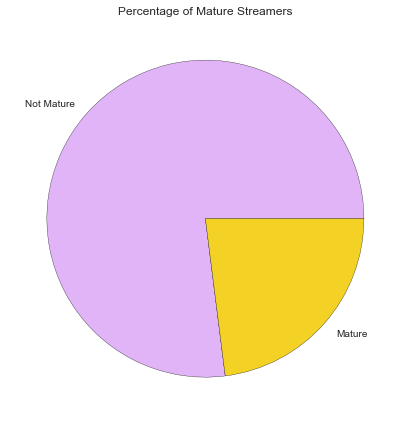

In [38]:
#Pie Chart of Amount of Mature Channels in Sample

mature_data = twitch_modified.groupby('Mature').count().loc[:,'Channel']

plt.figure(figsize=(10,6))
plt.style.use('seaborn')

labels = ['Not Mature', 'Mature']
slice_colors = ['#E1B4F7','#F4D225']

plt.pie(mature_data, labels= labels, colors= slice_colors, wedgeprops={'edgecolor': 'black'})

plt.title('Percentage of Mature Streamers')
plt.tight_layout()
plt.show()

In [35]:
# Cardinality / Unique Counts of Partnered category

def cardinality_pareto3(dataframe, column):
    temp = dataframe[column].value_counts().reset_index()
    temp['PercentOfTotal'] = temp[column] / temp[column].sum()
    temp['PercentRunningTotal'] = temp['PercentOfTotal'].cumsum()
    return temp

cardinality_pareto3(twitch_modified, 'Partnered')

,index,Partnered,PercentOfTotal,PercentRunningTotal
0,True,978,0.978,0.978
1,False,22,0.022,1.000


<font size= "6">Bivariate Analysis</font>

<font size= "3">Correlation Analysis</font>

In [61]:
# Qualitative Analysis
# Contingency Table of Mature vs. Partnered

data_crosstab = pd.crosstab(twitch_modified['Mature'],
                            twitch_modified['Partnered'],
                                margins = False)
                        
data_crosstab

Partnered,False,True
Mature,,
False,17,753
True,5,225


In [36]:
#Contingency table of Language vs. Partnered

data_crosstab2 = pd.crosstab(twitch_modified['Language'],
                            twitch_modified['Partnered'],
                                margins = False)
                        
data_crosstab2

Partnered,False,True
Language,,
Arabic,0,5
Chinese,0,30
Czech,0,6
English,9,476
Finnish,0,1
French,1,65
German,1,48
Greek,0,1
Hungarian,0,2


In [37]:
#Contingency table of Language vs. Matured

data_crosstab3 = pd.crosstab(twitch_modified['Language'],
                            twitch_modified['Mature'],
                                margins = False)
                        
data_crosstab3

Mature,False,True
Language,,
Arabic,5,0
Chinese,20,10
Czech,3,3
English,349,136
Finnish,0,1
French,51,15
German,35,14
Greek,1,0
Hungarian,1,1


In [43]:
# Quantitative Analysis
# Correlation Table of Mature vs. Partnered

data_crosstab.corr()

Partnered,False,True
Partnered,,
False,1.0,1.0
True,1.0,1.0


<AxesSubplot:>

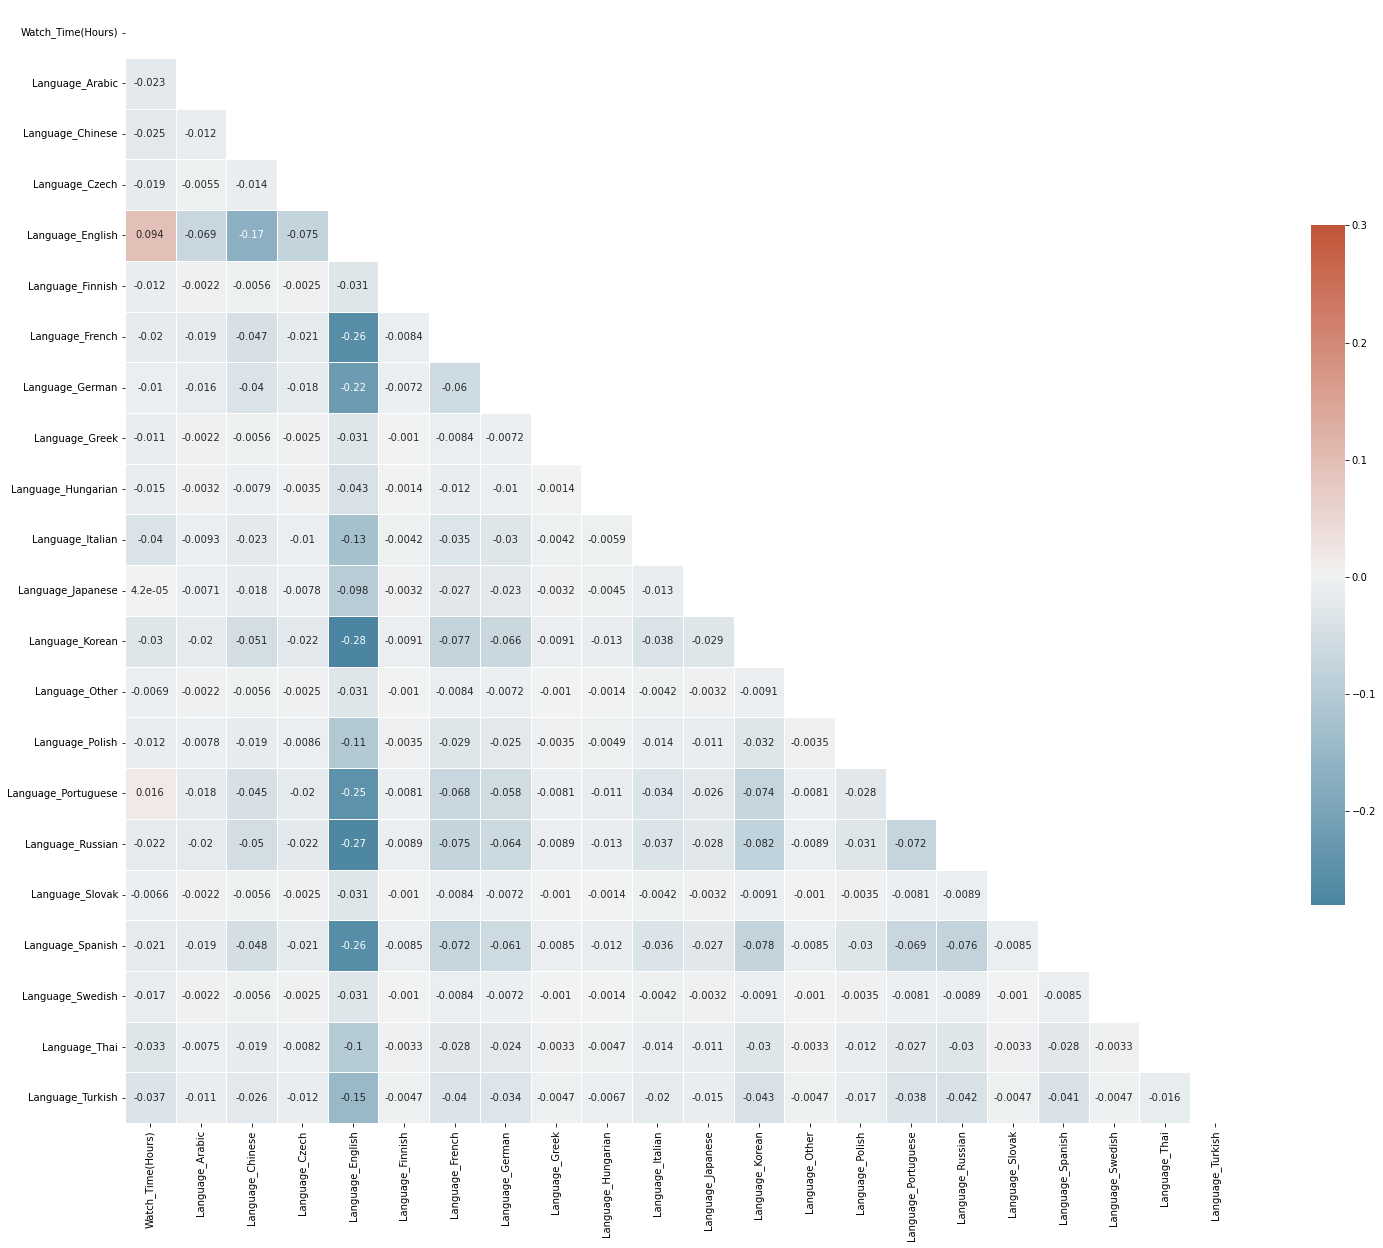

In [48]:
#Heat Map

corr = pd.get_dummies(twitch_modified[['Language', 'Watch_Time(Hours)']]). corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up heat map
f, ax = plt.subplots(figsize= (25,25))

# Generate a custom divergin colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, annot=True)

In [53]:
# Chai Square Test for language and maturity rating

for i in twitch_modified['Language'].unique():
    temp = twitch_modified.copy()
    temp['TempLanguage'] = twitch_modified['Language'].apply(
        lambda x: i if x == i else f'Not_{1}'
    )

    temp_crosstab = pd.crosstab(
        temp['TempLanguage'], twitch_modified['Mature'], margins=False
    )
    c, p, dof, expected = chi2_contingency(temp_crosstab)

    p = round(p, 2)

    if p == 1.0:
        output_text = "Not enough info"
    elif p < 0.05:
        output_text = f'{i} and channel maturity rating ARE independent'
    else:
        output_text = f'{i} and channel maturity rating are NOT independent'
    print(i, 'vs. Mature', '| P-value = ', p, "| ", output_text)

English vs. Mature | P-value =  0.0 |  English and channel maturity rating ARE independent
Portuguese vs. Mature | P-value =  0.44 |  Portuguese and channel maturity rating are NOT independent
Spanish vs. Mature | P-value =  0.22 |  Spanish and channel maturity rating are NOT independent
German vs. Mature | P-value =  0.44 |  German and channel maturity rating are NOT independent
Korean vs. Mature | P-value =  0.0 |  Korean and channel maturity rating ARE independent
French vs. Mature | P-value =  1.0 |  Not enough info
Russian vs. Mature | P-value =  0.03 |  Russian and channel maturity rating ARE independent
Japanese vs. Mature | P-value =  0.17 |  Japanese and channel maturity rating are NOT independent
Chinese vs. Mature | P-value =  0.25 |  Chinese and channel maturity rating are NOT independent
Czech vs. Mature | P-value =  0.28 |  Czech and channel maturity rating are NOT independent
Turkish vs. Mature | P-value =  0.82 |  Turkish and channel maturity rating are NOT independent


In [40]:
# Chai Square Test for Language and Partnered rating

for i in twitch_modified['Language'].unique():
    temp = twitch_modified.copy()
    temp['TempLanguage'] = twitch_modified['Language'].apply(
        lambda x: i if x == i else f'Not_{1}'
    )

    temp_crosstab = pd.crosstab(
        temp['TempLanguage'], twitch_modified['Partnered'], margins=False
    )
    c, p, dof, expected = chi2_contingency(temp_crosstab)

    p = round(p, 2)

    if p == 1.0:
        output_text = "Not enough info"
    elif p < 0.05:
        output_text = f'{i} and partnership ARE independent'
    else:
        output_text = f'{i} and partnership are NOT independent'
    print(i, 'vs. Partnered', '| P-value = ', p, "| ", output_text)

English vs. Partnered | P-value =  0.61 |  English and partnership are NOT independent
Portuguese vs. Partnered | P-value =  1.0 |  Not enough info
Spanish vs. Partnered | P-value =  1.0 |  Not enough info
German vs. Partnered | P-value =  1.0 |  Not enough info
Korean vs. Partnered | P-value =  0.88 |  Korean and partnership are NOT independent
French vs. Partnered | P-value =  1.0 |  Not enough info
Russian vs. Partnered | P-value =  0.0 |  Russian and partnership ARE independent
Japanese vs. Partnered | P-value =  1.0 |  Not enough info
Chinese vs. Partnered | P-value =  0.84 |  Chinese and partnership are NOT independent
Czech vs. Partnered | P-value =  1.0 |  Not enough info
Turkish vs. Partnered | P-value =  1.0 |  Not enough info
Italian vs. Partnered | P-value =  1.0 |  Not enough info
Polish vs. Partnered | P-value =  1.0 |  Not enough info
Thai vs. Partnered | P-value =  1.0 |  Not enough info
Arabic vs. Partnered | P-value =  1.0 |  Not enough info
Slovak vs. Partnered | P-v

In [42]:
# Chai Square Test for Partnered and maturity rating

for i in twitch_modified['Partnered'].unique():
    temp = twitch_modified.copy()
    temp['TempPartnered'] = twitch_modified['Mature'].apply(
        lambda x: i if x == i else f'Not_{1}'
    )

    temp_crosstab = pd.crosstab(
        temp['TempPartnered'], twitch_modified['Mature'], margins=False
    )
    c, p, dof, expected = chi2_contingency(temp_crosstab)

    p = round(p, 2)

    if p == 1.0:
        output_text = "Not enough info"
    elif p < 0.05:
        output_text = f'{i} and channel maturity rating ARE independent'
    else:
        output_text = f'{i} and channel maturity rating are NOT independent'
    print(i, 'vs. Mature', '| P-value = ', p, "| ", output_text)

True vs. Mature | P-value =  0.0 |  True and channel maturity rating ARE independent
False vs. Mature | P-value =  0.0 |  False and channel maturity rating ARE independent


In [66]:
# To filter the data for rows that are not mature and the channel's primary panguage is english

filt = (twitch_modified['Mature'] == 0) & (twitch_modified['Language'] == 'English')

<BarContainer object of 10 artists>

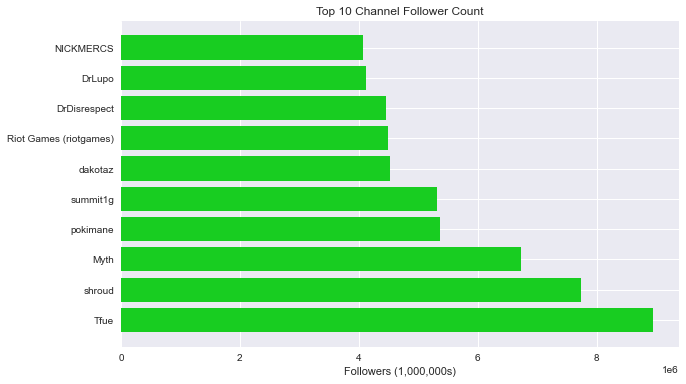

In [67]:
follower_pt = twitch_modified[filt].pivot_table(index='Channel', values='Followers', aggfunc= np.median).sort_values('Followers', ascending=0).head(10)

plt.figure(figsize=(10,6))
plt.style.use('seaborn-bright')

plt.title('Top 10 Channel Follower Count')
plt.xlabel('Followers (1,000,000s)')

plt.barh(follower_pt.index,follower_pt['Followers'], color= '#18CD21')


<BarContainer object of 10 artists>

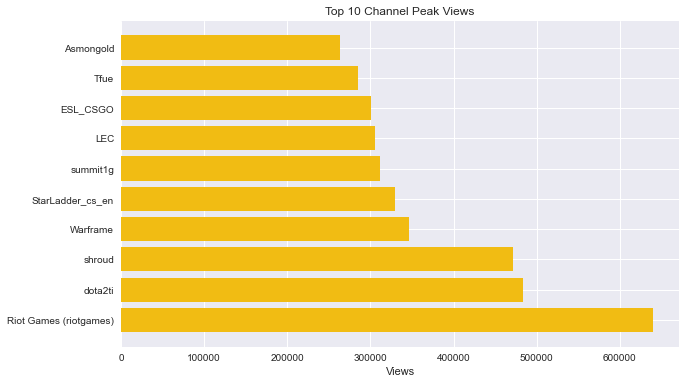

In [68]:
Peak_Viewer_pt = twitch_modified[filt].pivot_table(index= 'Channel', values= 'Peak_Viewers', aggfunc=np.median).sort_values('Peak_Viewers', ascending= 0).head(10)

plt.figure(figsize=(10,6))
plt.style.use('seaborn-bright')

plt.title('Top 10 Channel Peak Views')
plt.xlabel('Views')

plt.barh(Peak_Viewer_pt.index, Peak_Viewer_pt['Peak_Viewers'], color= '#F1BC13')

<BarContainer object of 10 artists>

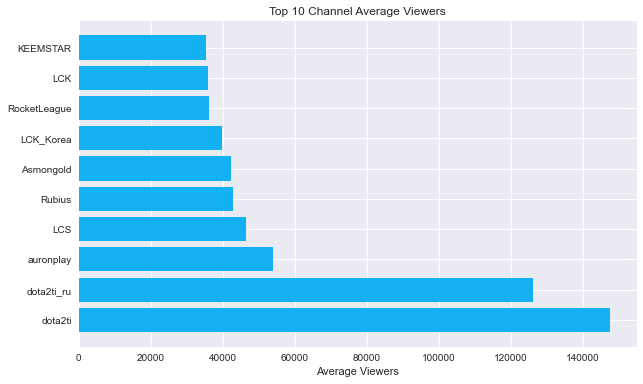

In [43]:
Average_Viewer_pt = twitch_modified.pivot_table(index= 'Channel', values= 'Average_Viewers', aggfunc=np.median).sort_values('Average_Viewers', ascending= 0).head(10)

plt.figure(figsize=(10,6))
plt.title("Top 10 Channel Average Viewers")
plt.xlabel('Average Viewers')

plt.barh(Average_Viewer_pt.index, Average_Viewer_pt['Average_Viewers'], color= '#13B1F1')

/var/folders/y_/ysyrdtz17d57_0xk5j1h5yrm0000gn/T/ipykernel_7452/4116979792.py:8: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



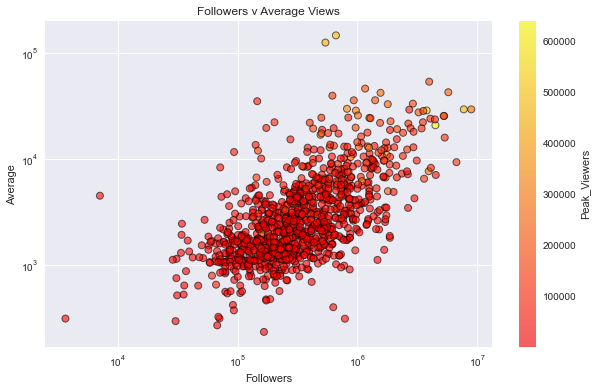

In [70]:
x = twitch_modified['Followers']
y = twitch_modified['Average_Viewers']
z = twitch_modified['Peak_Viewers']

plt.figure(figsize=(10,6))
plt.scatter(x, y, c=z, cmap= 'autumn', edgecolors= 'black', linewidths=1, alpha=0.60)

cbar = plt.colorbar()
cbar.set_label('Peak_Viewers')

plt.title('Followers v Average Views')
plt.xlabel('Followers')
plt.ylabel('Average')

plt.xscale('log')
plt.yscale('log')

plt.show()


In [77]:
twitch_modified.groupby(['Channel','Followers_Gained', 'Views_Gained']).median()

,,,Watch_Time(Hours),Stream_Time(Hours),Peak_Viewers,Average_Viewers,Followers,Partnered,Mature
Channel,Followers_Gained,Views_Gained,,,,,,,
10000DAYS,158473,10528149,793.024167,2192.75,11193.0,1255.0,356683.0,1.0,0.0
1DrakoNz,252999,6950267,1154.982847,1653.00,15242.0,2655.0,373375.0,1.0,1.0
1PVCS,31807,8056327,726.027500,897.25,23081.0,2256.0,71596.0,1.0,0.0
39daph,470589,8983449,2356.723958,2258.25,12648.0,3766.0,505362.0,1.0,0.0
72hrs,315190,12051692,2404.900764,2275.25,30702.0,3756.0,1024814.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
핑맨 (95pingman),97696,3424139,762.377292,790.50,26738.0,3449.0,195423.0,1.0,0.0
한동숙 (handongsuk),73602,30610352,7507.721875,2130.25,44976.0,12869.0,385250.0,1.0,0.0
햇살살 (hatsalsal),25730,5576914,723.199097,1984.00,3915.0,1302.0,77861.0,1.0,0.0


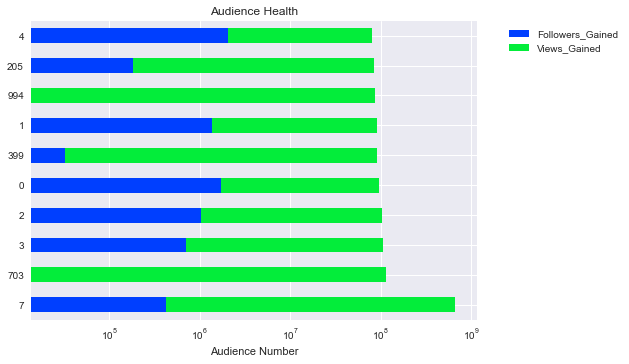

In [116]:
Growth = twitch_modified.loc[:,['Channel','Followers_Gained', 'Views_Gained']].sort_values('Views_Gained', ascending=0).head(10)
plotData = pd.DataFrame({'Channel': Growth['Channel'], 'Followers_Gained': Growth['Followers_Gained'], 'Views_Gained': Growth['Views_Gained']})

plotData.set_index('Channel')
ax = plotData.plot.barh(stacked= True)

plt.legend(bbox_to_anchor=(1.05,1), loc= 'upper left')
plt.title('Audience Health')
plt.xlabel('Audience Number')
plt.xscale('log')

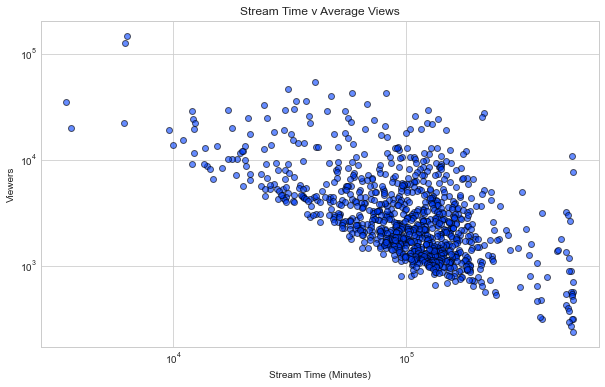

In [88]:
x = twitch_modified['Stream_Time(Minutes)']
y = twitch_modified['Average_Viewers']

plt.figure(figsize=(10,6))
plt.scatter(x, y, cmap= 'winter', edgecolors= 'black', linewidths=1, alpha=0.60)

plt.title('Stream Time v Average Views')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Viewers')

plt.xscale('log')
plt.yscale('log')

plt.show()